# Objectif :
- Comprendre du mieux possible nos données en vue d'une segmentation client


# Analyse de Forme :

- **variable target** : Indeterminée ( Cas d'une segmentation  )
- **Structure** : Le dataset contient 2240 examples et 29 variables
- **types de variables** : qualitatives : 3, quantitatives : 25
- **Analyse des valeurs** : Aucune NaN, Aucune valeur nulle


# Analyse de Fond :

- Les individus ont dans la grande majorité le meme revenu
- Le nombre de clients acceptants l'offre est similaire dans les 5 premiéres campagnes , elle est la plus élevée dans la derniére offre
- Le nombre d'achats effectués avec une remise est significativement élevée pour atteindre 8 achats au max avec une baisse génerale du nombre , la plupart des clients font 5 achats max malgré la remise
- La majorité des clients consomme respectivement des sucreries , des fruits , du poisson 
- Les clients achéte le plus respectivement sur le site web , à l'aide d'un catalogue , directement en magasin et visite réguliérement le site
- Trés peu de clients se sont plaint au cours des 2 derniéres années
- Trés peu de clients achéte réguliérement avec un minimum de 7 jours pour les fidéles
- Les clients ont en grande majorité des enfants moins de 18 ans , avec une dominance d'adolescents
- Les clients ont en général la licence ou plus en terme d'éducation
- Les clients sont pour la plupart marriés et ensemble avec une part significative de célibataires et de divorcés

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [135]:
data = pd.read_csv('simplonline01.csv', delimiter="\t")
data.set_index('ID', inplace = True) # Mettre une colonne en index
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


## Présentation du dataset

In [121]:
print(f'Le dataset contient {data.shape[0]} examples et {data.shape[1]} variables')

Le dataset contient 2240 examples et 28 variables


In [122]:
data.info() # toutes les colonnes et leurs types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [123]:
missing_rate = data.isna().sum()
missing_rate # Donne le nbre de NaN

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [144]:
data.dropna(inplace=True) # Suppression des valeurs nulles étant faibles

In [146]:
data.shape[0] # Nbre de lignes restantes aprés suppression

2216

In [148]:
data.nunique() # Connaitre les valeurs uniques d'un dataset ( constantes nbre unique = 1 )

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [153]:
data.columns[[25]] # test de position

Index(['Z_CostContact'], dtype='object')

In [154]:
# data.drop('ID', axis=1, inplace=True) # Suppression d'une colonne unique
data = data.drop(data.columns[[25,26]], axis=1) # permet de supprimer une colonne à partir de sa position

In [156]:
d2 = data.copy() # Effectuer les transformations sur une copie afin de garder l'original intact en cas d'erreur
pd.set_option('max_columns', None) # Afficher les colonnes ici toutes
d2.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


## Variables quantitatives continues

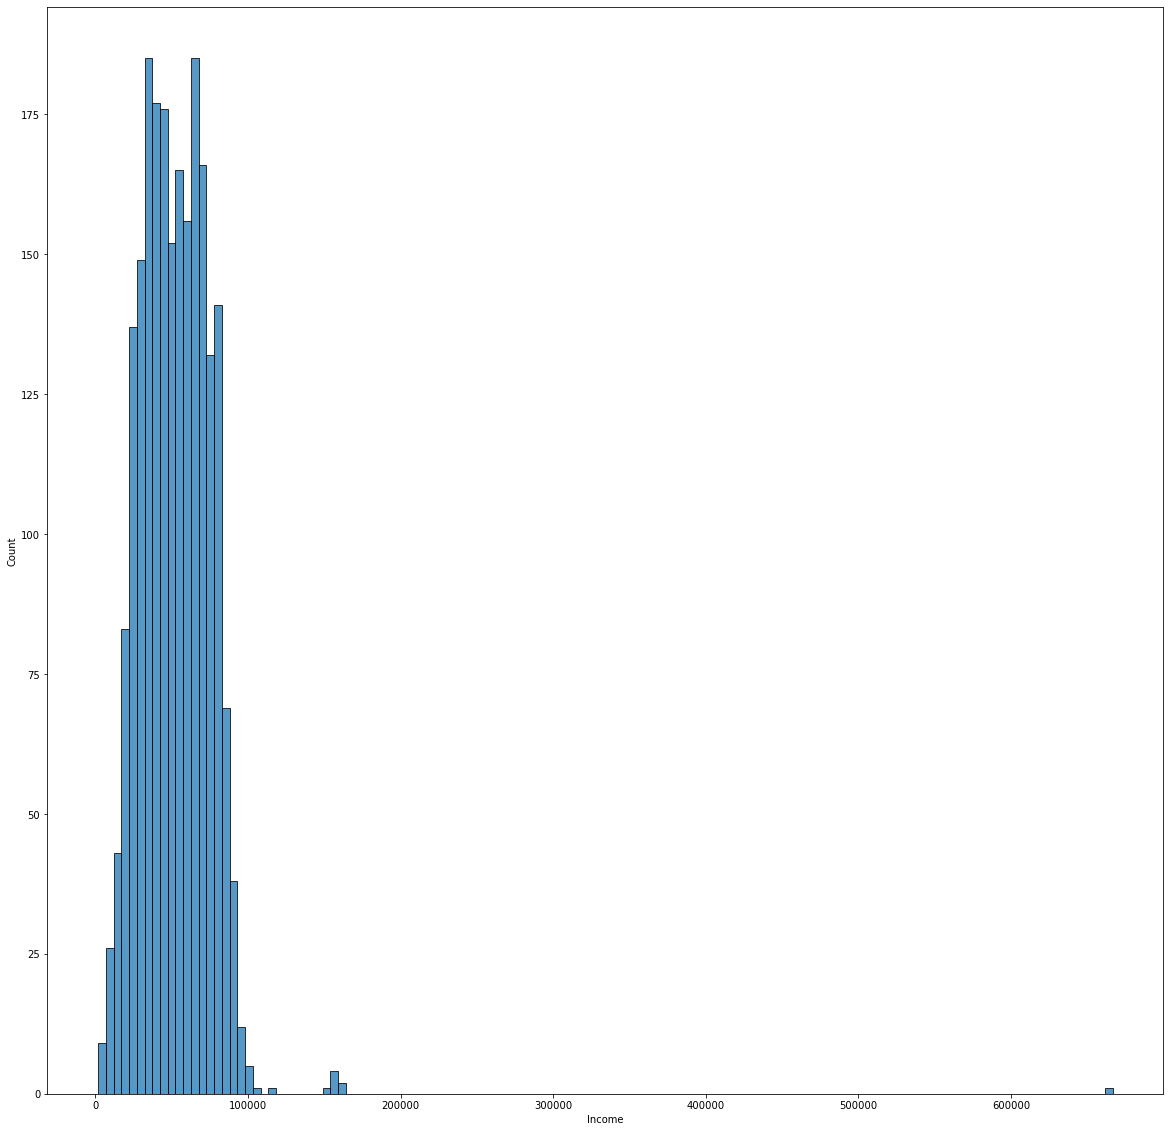

In [157]:
figure(figsize=(20, 20))
sns.histplot(x='Income', data=d2)
plt.show()

Les revenues sont majoritairement compris entre 0 et 100000 
Trés faiblement entre 100000 et 200000 et a priori une seule personne à un revenu trés élévé ( 675000 environ )

## Variables Qualitatives

In [17]:
data2['Education'].value_counts() # Sous-catégories en nbre

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

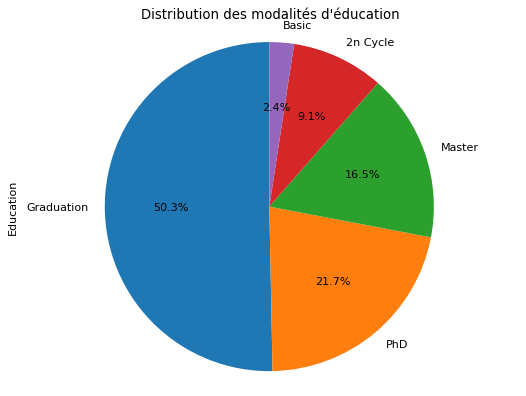

In [70]:
from matplotlib.pyplot import figure
plt.figure(figsize=(8,6), dpi=80) # Création d'une figure de 8x6 de 80 de résoultion
data2['Education'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90) # Visualisation d'une variable qualitative 
plt.axis('equal') # Améliore l'affichage des labels par rapport au titre
# plt.savefig('PieChart01.png') # Sauvegarder l'image
title("Distribution des modalités d'éducation")
plt.show() # Affichage uniquement du graphique

In [51]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

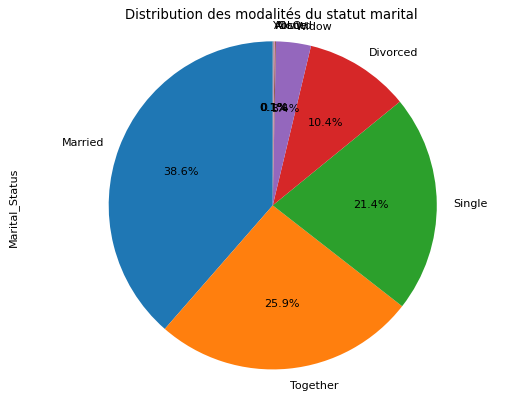

In [75]:
plt.figure(figsize=(8,6), dpi=80)
data2['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')
title("Distribution des modalités du statut marital")
plt.show()

# Variables quantitatives 

In [82]:
int_col = data2.columns[data2.dtypes == 'int64']
int_col

Index(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

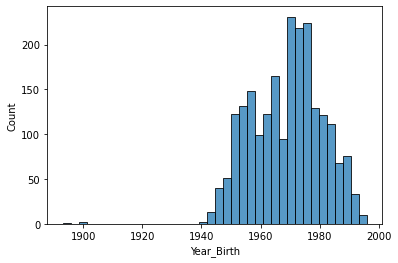

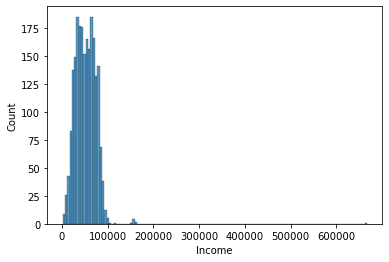

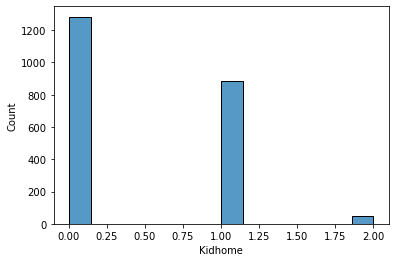

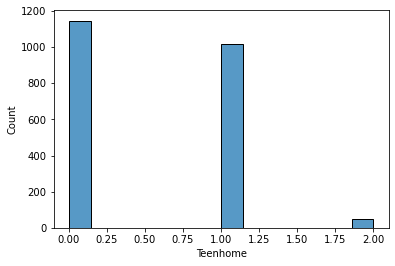

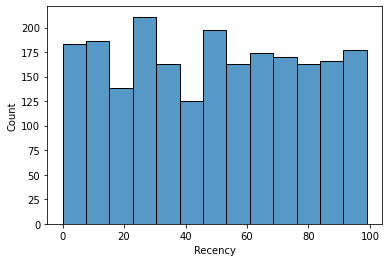

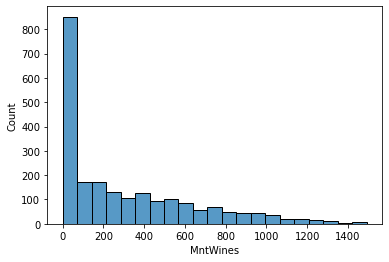

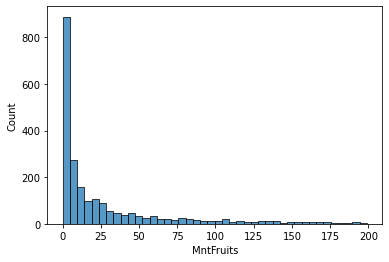

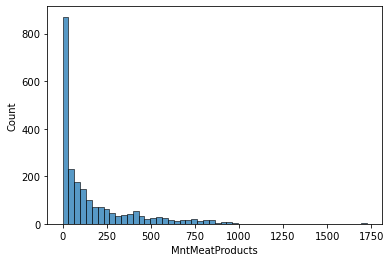

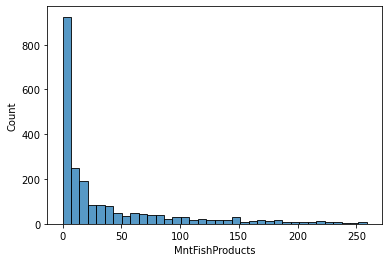

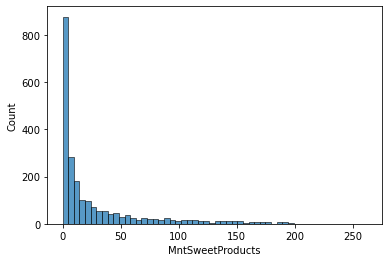

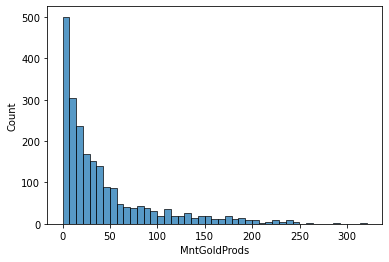

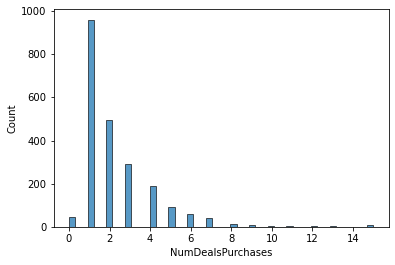

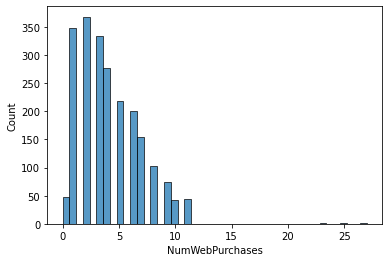

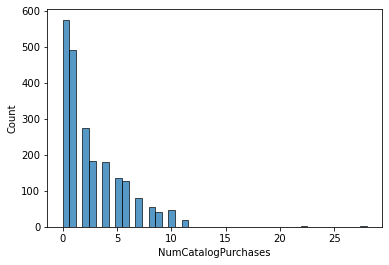

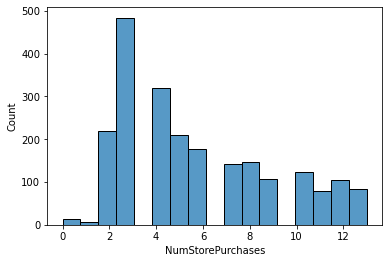

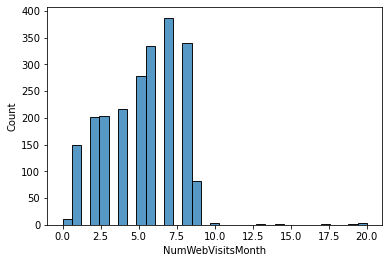

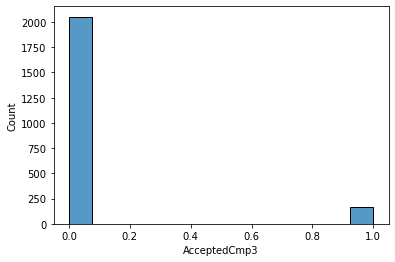

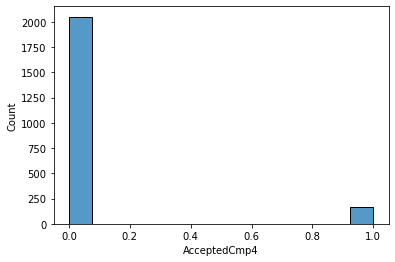

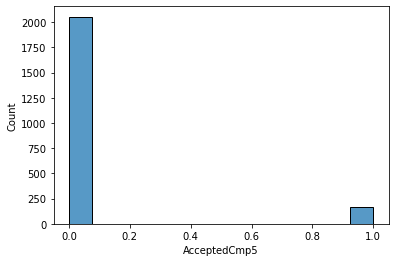

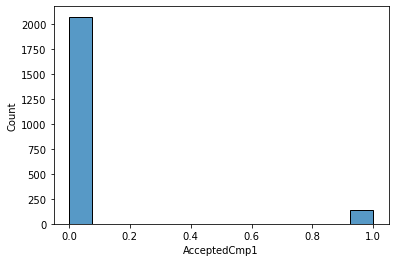

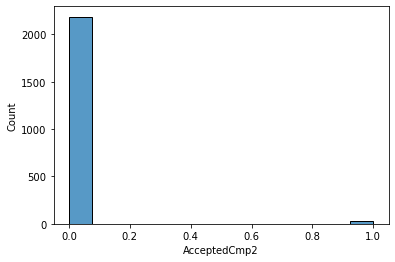

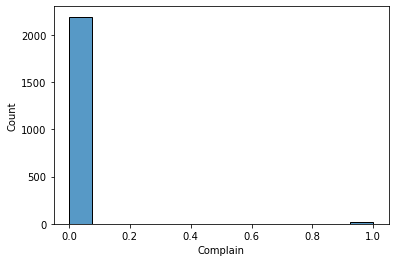

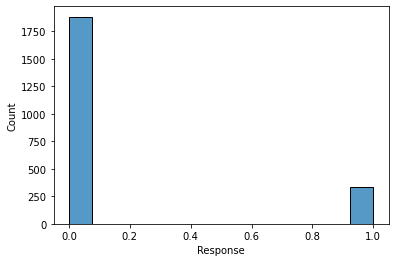

In [158]:
for col in d2.select_dtypes(np.number):
    plt.figure()
    sns.histplot(d2[col])

In [162]:
for col in data.select_dtypes(np.number):
    print(f'{col :-<50} {data[col].value_counts()}') # Valeurs et nombres des sous-modalités quantitatives

Year_Birth---------------------------------------- 1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1952    52
1958    52
1977    52
1968    51
1966    50
1959    50
1960    49
1954    49
1955    48
1967    44
1963    44
1962    44
1982    44
1951    42
1986    41
1983    41
1964    41
1957    41
1980    39
1981    38
1984    38
1953    35
1961    35
1985    32
1949    30
1988    29
1989    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1940     1
1893     1
1899     1
1941     1
1900     1
Name: Year_Birth, dtype: int64
Income-------------------------------------------- 7500.0     12
35860.0     4
18929.0     3
34176.0     3
48432.0     3
           ..
71022.0     1
30675.0     1
30168.0     1
19656.0     1
41728.0     1
Name: Income, Length: 1974, dtype: int64
Kidhome----------------

In [107]:
kids_per = data['Kidhome'].sum()/data.shape[0]
kids_per

0.4417870036101083

In [108]:
teen_per = data['Teenhome'].sum()/data.shape[0]
teen_per

0.5054151624548736

In [105]:
kids_per + teen_per

0.9472021660649819

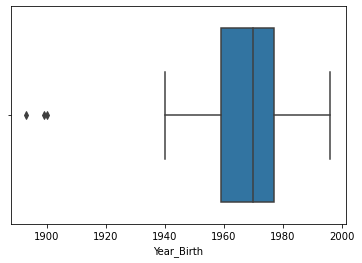

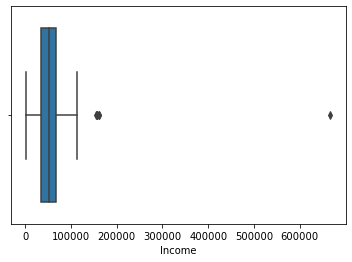

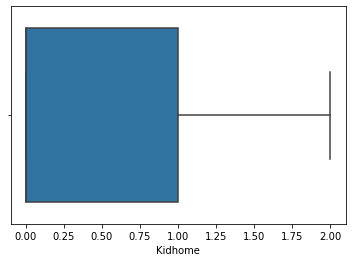

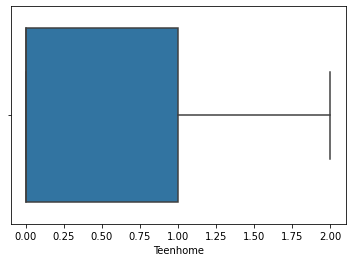

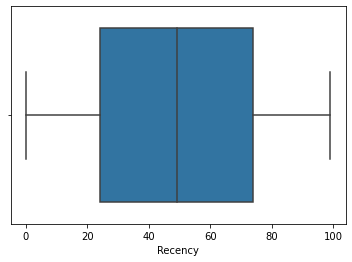

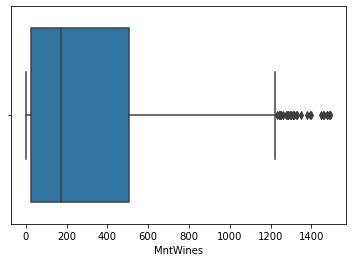

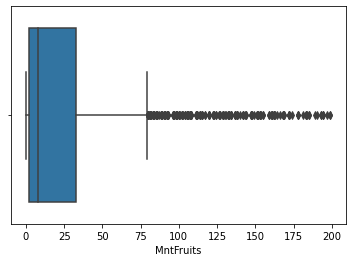

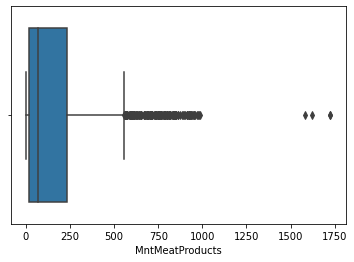

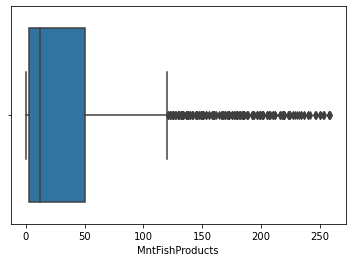

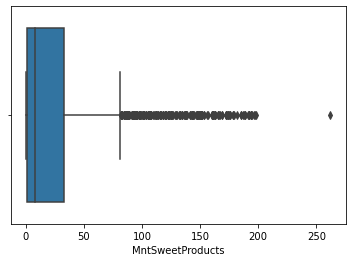

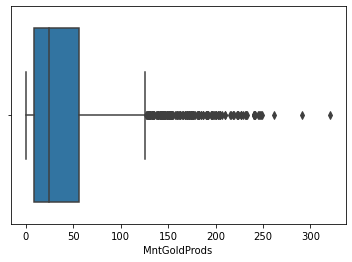

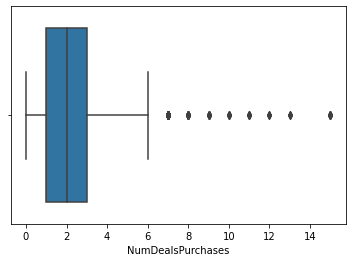

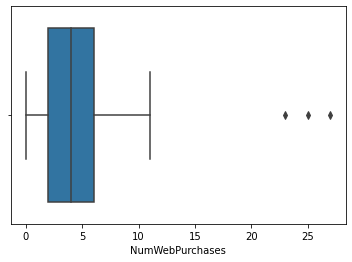

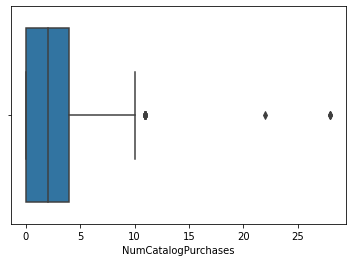

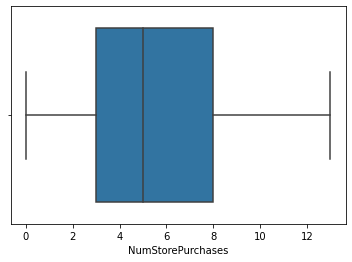

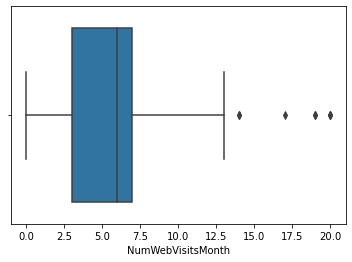

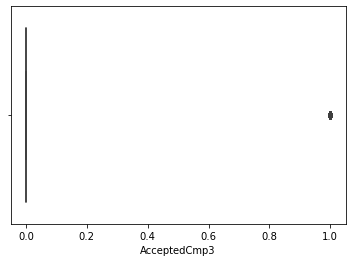

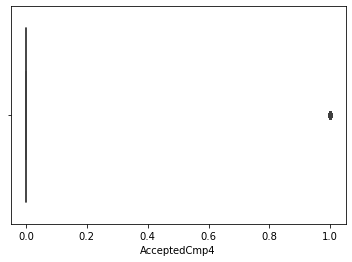

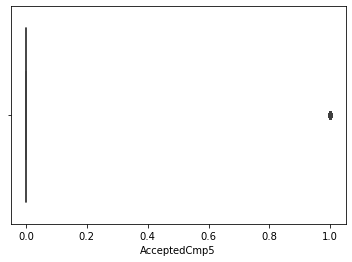

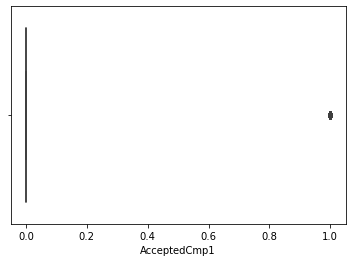

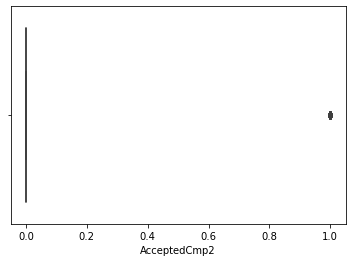

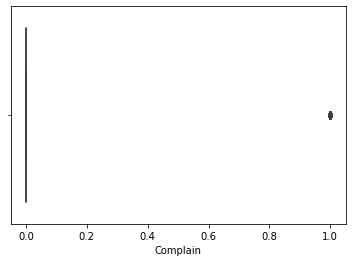

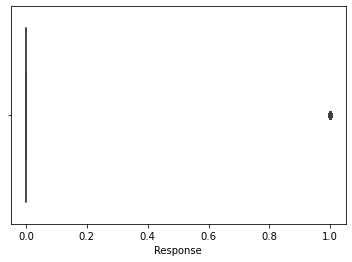

In [163]:
for col in d2.select_dtypes(np.number):
    plt.figure()
    sns.boxplot(d2[col]) # Visualisation des valeurs extremes et aberrantes

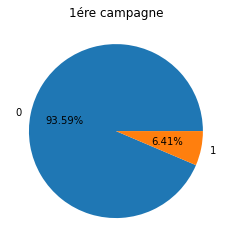

In [164]:
plt.pie(data['AcceptedCmp1'].value_counts(), autopct= "%1.2f%%", labels=data['AcceptedCmp1'].unique())
plt.title('1ére campagne')
plt.show()

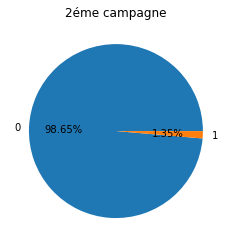

In [165]:
plt.pie(data['AcceptedCmp2'].value_counts(), autopct= "%1.2f%%", labels=data['AcceptedCmp2'].unique())
plt.title('2éme campagne')
plt.show()

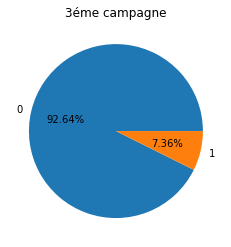

In [166]:
plt.pie(data['AcceptedCmp3'].value_counts(), autopct= "%1.2f%%", labels=data['AcceptedCmp3'].unique())
plt.title('3éme campagne')
plt.show()

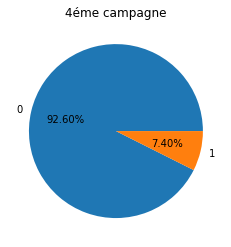

In [167]:
plt.pie(data['AcceptedCmp4'].value_counts(), autopct= "%1.2f%%", labels=data['AcceptedCmp4'].unique())
plt.title('4éme campagne')
plt.show()

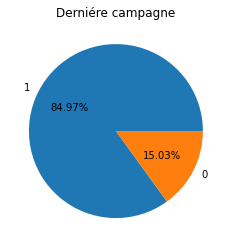

In [169]:
plt.pie(data['Response'].value_counts(), autopct= "%1.2f%%", labels=data['Response'].unique())
plt.title('Derniére campagne')
plt.show()

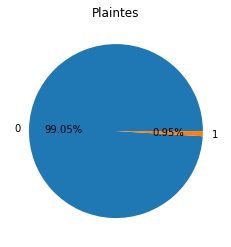

In [170]:
plt.pie(data['Complain'].value_counts(), autopct= "%1.2f%%", labels=data['Complain'].unique())
plt.title('Plaintes')
plt.show()

In [ ]:
# sns.pairplot(d2)

## Preprocessing

In [171]:
from datetime import datetime

In [179]:
def annees_ages(valeur):
    dateCourant = datetime.now()
    date=dateCourant.date()
    annee = date.strftime("%Y")
    age = int(annee) - valeur
    return age

In [180]:
d2['Ages'] = d2['Year_Birth'].map(annees_ages)
d2['Ages'].head()

ID
5524    64
2174    67
4141    56
6182    37
5324    40
Name: Ages, dtype: int64

In [182]:
d2.drop('Year_Birth', axis=1, inplace=True)
d2.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64
2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67
4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56
6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37
5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40


In [185]:
### La variable sont convertis en type date
d2['Dt_Customer'] = pd.to_datetime(d2['Dt_Customer'])
d2['Dt_Customer'].head()

ID
5524   2012-04-09
2174   2014-08-03
4141   2013-08-21
6182   2014-10-02
5324   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [186]:
def dates_jours(valeur):
    dateCourant = datetime.now()
    date=dateCourant.date()
    annee = date.strftime("%Y")
    
    dr = str(datetime.strptime(annee, "%Y")-valeur)
    return dr

In [187]:
d2['Anciennete'] = d2['Dt_Customer'].map(dates_jours)
d2['Anciennete']

ID
5524     3189 days 00:00:00
2174     2343 days 00:00:00
4141     2690 days 00:00:00
6182     2283 days 00:00:00
5324     2539 days 00:00:00
                ...        
10870    2759 days 00:00:00
4001     2279 days 00:00:00
7270     2533 days 00:00:00
8235     2534 days 00:00:00
9405     3000 days 00:00:00
Name: Anciennete, Length: 2216, dtype: object

In [188]:
def split_string(valeur):
    liste_split = valeur.split()
    return int(liste_split[0]) # Récupération du 1er élement d'une liste

In [189]:
d2['Anciennete_jrs'] = d2['Anciennete'].map(split_string)

In [191]:
d2.drop('Anciennete', axis=1, inplace=True)
d2.drop('Dt_Customer', axis=1, inplace=True)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,3189
2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2343
4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,2690
6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,2283
5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,2539


In [192]:
d2['Education'].astype("category").cat.codes # Les catégories peuvent etre classés

ID
5524     2
2174     2
4141     2
6182     2
5324     4
        ..
10870    2
4001     4
7270     2
8235     3
9405     4
Length: 2216, dtype: int8

In [194]:
d2['Education'] = d2['Education'].astype("category").cat.codes

In [198]:
d2 = pd.get_dummies(d2 , columns=['Marital_Status'])

In [199]:
d2.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,3189,0,0,0,0,1,0,0,0
2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2343,0,0,0,0,1,0,0,0
4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,2690,0,0,0,0,0,1,0,0
6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,2283,0,0,0,0,0,1,0,0
5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,2539,0,0,0,1,0,0,0,0


In [202]:
d2.drop('Marital_Status_Absurd', axis=1, inplace=True) # Catégories en faible proportion et jugées imcompréhensibles
d2.drop('Marital_Status_YOLO', axis=1, inplace=True) # Voir diagramme status marital

In [236]:
d2

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,3189,0,0,0,1,0,0
2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2343,0,0,0,1,0,0
4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,2690,0,0,0,0,1,0
6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,2283,0,0,0,0,1,0
5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,2539,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,2,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54,2759,0,0,1,0,0,0
4001,4,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75,2279,0,0,0,0,1,0
7270,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40,2533,0,1,0,0,0,0


In [237]:
d2.dtypes # Vérification des types aprés transformation des données

Education                     int8
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Complain                     int64
Response                     int64
Ages                         int64
Anciennete_jrs               int64
Marital_Status_Alone         uint8
Marital_Status_Divorced      uint8
Marital_Status_Married       uint8
Marital_Status_Singl

In [205]:
from sklearn.preprocessing import StandardScaler

In [215]:
int_col = d2.columns[d2.dtypes == 'int64']

In [221]:
int_df = pd.DataFrame(data=d2,columns=int_col)
int_df.head() # Dataframe des valeurs quantitatives 

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs
ID,,,,,,,,,,,,,,,,,,,,,,,
5524,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,3189
2174,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2343
4141,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,2690
6182,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,2283
5324,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,2539


In [238]:
int_df.insert(0, column='Education', value=d2['Education'], allow_duplicates=False) # Ajout d'une colonne dans un dataframe existant

In [239]:
int_df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs
ID,,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,3189
2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2343
4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,2690
6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,2283
5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,2539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,2,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54,2759
4001,4,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75,2279
7270,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40,2533


In [240]:
X = StandardScaler().fit_transform(int_df)
X

array([[-0.35052725,  0.2340627 , -0.82303932, ...,  2.37795178,
         0.98644293,  1.97487499],
       [-0.35052725, -0.23455948,  1.03993835, ..., -0.42052997,
         1.23680074, -1.66514078],
       [-0.35052725,  0.76947764, -0.82303932, ..., -0.42052997,
         0.31882209, -0.17213195],
       ...,
       [-0.35052725,  0.18809052, -0.82303932, ..., -0.42052997,
        -1.01641959, -0.84764315],
       [ 0.53924181,  0.67538765, -0.82303932, ..., -0.42052997,
         1.06989553, -0.84334053],
       [ 1.42901088,  0.02470453,  1.03993835, ...,  2.37795178,
         1.23680074,  1.16167998]])

In [241]:
norm_int = pd.DataFrame(data=X,columns=int_df.columns)
norm_int # dataframe des données quantitatives normalisées

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs
0,-0.350527,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.986443,1.974875
1,-0.350527,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.236801,-1.665141
2,-0.350527,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.318822,-0.172132
3,-0.350527,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.266777,-1.923298
4,1.429011,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,-0.821827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.350527,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.151917,0.124749
2212,1.429011,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,-0.420530,1.904422,-1.940508
2213,-0.350527,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,-0.847643
2214,0.539242,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.069896,-0.843341


In [243]:
qual_col = d2.columns[d2.dtypes == 'uint8']
qual_col

Index(['Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

In [263]:
qual_df = pd.DataFrame(data=d2,columns= qual_col)
qual_df # Dataframe des données qualitatives 

,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
ID,,,,,,
5524,0,0,0,1,0,0
2174,0,0,0,1,0,0
4141,0,0,0,0,1,0
6182,0,0,0,0,1,0
5324,0,0,1,0,0,0
...,...,...,...,...,...,...
10870,0,0,1,0,0,0
4001,0,0,0,0,1,0
7270,0,1,0,0,0,0


In [304]:
df = pd.merge(norm_int.reset_index(), qual_df.reset_index(), how='outer',left_index= True, right_index=True)
df

,index,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs,ID,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0,-0.350527,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.986443,1.974875,5524,0,0,0,1,0,0
1,1,-0.350527,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.236801,-1.665141,2174,0,0,0,1,0,0
2,2,-0.350527,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.318822,-0.172132,4141,0,0,0,0,1,0
3,3,-0.350527,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.266777,-1.923298,6182,0,0,0,0,1,0
4,4,1.429011,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,-0.821827,5324,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2211,-0.350527,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.151917,0.124749,10870,0,0,1,0,0,0
2212,2212,1.429011,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,-0.420530,1.904422,-1.940508,4001,0,0,0,0,1,0
2213,2213,-0.350527,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,-0.847643,7270,0,1,0,0,0,0
2214,2214,0.539242,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.069896,-0.843341,8235,0,0,0,0,1,0


In [305]:
df.drop('index', axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)

In [306]:
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,-0.350527,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.986443,1.974875,0,0,0,1,0,0
1,-0.350527,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.236801,-1.665141,0,0,0,1,0,0
2,-0.350527,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.318822,-0.172132,0,0,0,0,1,0
3,-0.350527,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.266777,-1.923298,0,0,0,0,1,0
4,1.429011,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,-0.821827,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.350527,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.151917,0.124749,0,0,1,0,0,0
2212,1.429011,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,-0.420530,1.904422,-1.940508,0,0,0,0,1,0
2213,-0.350527,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,-0.847643,0,1,0,0,0,0
2214,0.539242,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.069896,-0.843341,0,0,0,0,1,0


In [44]:
X_std = np.nan_to_num(X_stdscl) # Conversion des nbres infinis en finis et des NaN en 0 

In [307]:
#k-means avec 2 groupes
from sklearn import cluster
res = cluster.KMeans(n_clusters=3)
res.fit(df)

KMeans(n_clusters=3)

In [308]:
res.labels_

array([0, 1, 2, ..., 2, 2, 1])

In [309]:
# effectifs par groupe
np.unique(res.labels_,return_counts=True)

(array([0, 1, 2]), array([ 552, 1028,  636], dtype=int64))

In [ ]:
#rajouter la variable au data-frame initial
B = df.copy()
B['labels'] = res.labels_

#configuration des points dans le plan
#des variables prises par paires
sns.pairplot(B,hue="labels")

In [312]:
#moyennes par groupe
gb = df.groupby(res.labels_)

In [313]:
#effectifs par classe
gb.size()

0     552
1    1028
2     636
dtype: int64

In [314]:
#moyennes par classe
gb.mean()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Anciennete_jrs,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,-0.047490,1.011264,-0.745415,-0.659260,0.017591,0.908964,1.061025,1.333091,1.148717,1.067738,0.652693,-0.551596,0.366189,1.174221,0.773038,-1.046034,0.044394,0.201711,0.783952,0.648225,0.180702,-0.060415,0.421042,0.019330,0.006910,0.000000,0.092391,0.360507,0.242754,0.257246,0.043478
1,-0.109043,-0.689281,0.657557,-0.113656,0.010084,-0.781157,-0.535589,-0.639678,-0.554756,-0.533104,-0.551755,-0.136367,-0.718009,-0.722013,-0.797479,0.468577,0.005159,-0.252978,-0.280839,-0.257689,-0.100313,0.032713,-0.159193,-0.239044,-0.145554,0.001946,0.098249,0.391051,0.228599,0.255837,0.024319
2,0.217470,0.236420,-0.415879,0.755896,-0.031566,0.473713,-0.055188,-0.123078,-0.100319,-0.065032,0.325342,0.699161,0.842732,0.147893,0.618069,0.150494,-0.046870,0.233831,-0.226477,-0.146094,0.005305,-0.000439,-0.108121,0.369602,0.229270,0.001572,0.125786,0.402516,0.160377,0.264151,0.042453


In [53]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [335]:
#identification du nombre de groupes -- 1 à 10
from yellowbrick.cluster import KElbowVisualizer
cluster_nb = KElbowVisualizer(res,k=(1,10),metric='distortion',timings=True)

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=None)

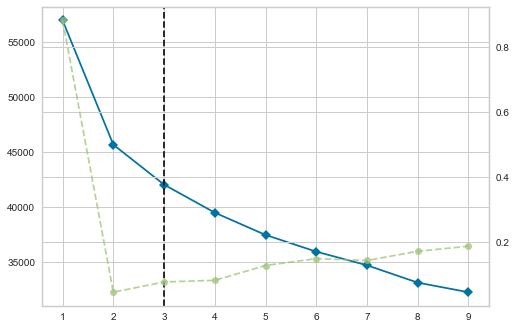

In [336]:
#calculs
cluster_nb.fit(df)

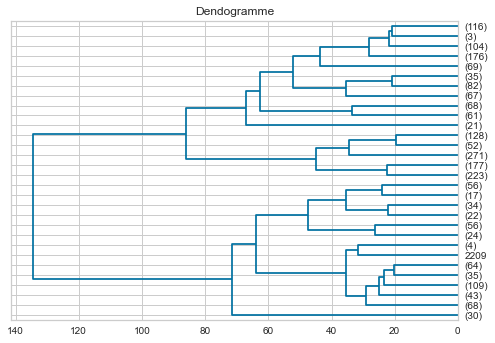

In [325]:
import scipy 
from scipy.cluster.hierarchy import dendrogram, linkage
#générer la matrice des liens
Z = linkage(df,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("Dendogramme")
dendrogram(Z,truncate_mode='lastp',labels=df.index,orientation='left',color_threshold=0)
plt.show()

In [326]:
# from scipy.cluster.hierarchy import fcluster
# #matérialisation des 4 classes (hauteur t = 375000)
# plt.title('CAH avec matérialisation des 4 classes')
# dendrogram(Z,labels=df.index,orientation='left',color_threshold=7)
# plt.show()
# #découpage à la hauteur t = 375000 ==> identifiants de 4 groupes obtenus
# groupes_cah = fcluster(Z,t=37500,criterion='distance')
# print(groupes_cah)
# #index triés des groupes
# idg = np.argsort(groupes_cah)
# #affichage des observations et leurs groupes
# group=pd.DataFrame(df.index[idg],groupes_cah[idg])